# Gaussian Processes in PyTorch

In [1]:
import torch
import torch.nn as nn
import torch.distributions as td

In [2]:
class GaussianProcess(nn.Module):
  def __init__(self):
    super().__init__()

    self.X_o = torch.empty((0, 1))
    self.y_o = torch.empty((0, 1))

  def kernel(self, X1, X2):
    return torch.exp(-torch.cdist(X1, X2)**2/0.1)

  def mean(self, X):
    return torch.zeros_like(X)

  def fit(self, X, y):
    self.X_o = torch.cat([self.X_o, X], dim=0)
    self.y_o = torch.cat([self.y_o, y], dim=0)
  
  def predict(self, X_t):
    K_tt = self.kernel(X_t, X_t)
    mu = self.mean(X_t)
    sigma = K_tt
  
    if self.X_o.numel() > 0:
      K_oo = self.kernel(self.X_o, self.X_o)
      K_ot = self.kernel(self.X_o, X_t)

      K_oo_inv = torch.linalg.pinv(K_oo)

      mu = mu + K_ot.T @ K_oo_inv @ (self.y_o - self.mean(self.X_o))
      sigma = sigma - K_ot.T @ K_oo_inv @ K_ot

    sigma = sigma + 1e-5*torch.eye(sigma.size(0))

    posterior = td.MultivariateNormal(mu.view(-1), sigma)
    return posterior

In [3]:
gp = GaussianProcess()
prior = gp.predict(torch.linspace(-1, 1, 200).unsqueeze(1))

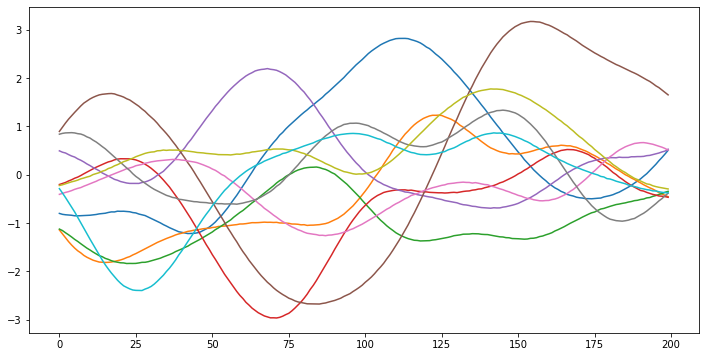

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
for i in range(10):
  plt.plot(prior.sample())
_ = plt.show()

In [7]:
X_o = torch.tensor([-0.2, 0.2])
y_o = torch.tensor([0.4, -0.4])
gp.fit(X_o.unsqueeze(1), y_o.unsqueeze(1))
posterior = gp.predict(torch.linspace(-1, 1, 100).unsqueeze(1))

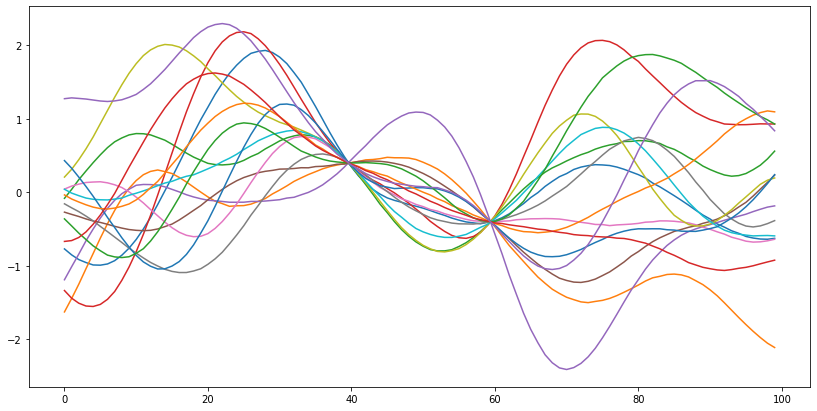

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
for i in range(15):
  plt.plot(posterior.sample())
_ = plt.show()